In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def binarize_image(image, threshold, show=False):

    # Apply binary thresholding
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

    # Show the original and binarized images
    if show:
        cv2.imshow('Original Image', image)
        cv2.imshow('Binarized Image', binary_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    return binary_image

def grayscale_image(image_path, show=False):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if show:
        cv2.imshow('Grayscale Image', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    return image

def get_canny_edges(binary_image, show = False):
    edges = cv2.Canny(binary_image, 100, 200)  # Adjust the threshold values as needed
    if show:
        cv2.imshow('Detected edges', edges)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    return edges

def rotate_image(image, angle, show = False):    
    # Get image dimensions
    height, width = image.shape[:2]
    
    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    
    # Apply rotation to the image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    
    if show:
        # Show the original and rotated images
        cv2.imshow('Original Image', image)
        cv2.imshow('Rotated Image', rotated_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    return rotated_image

In [34]:
image_path = 'images/raw/C4-diam-5x-1Light.jpg'  # Replace 'example_image.jpg' with the path to your image
threshold_value = 200  # Threshold value (0-255)
rotation_angle = -3.30  # Rotation angle in degrees
calibration = 1.35 # [px/µm]
#fimg = get_canny_edges(rotate_image(binarize_image(image_path, threshold_value), rotation_angle))
gray_img = rotate_image(grayscale_image(image_path),rotation_angle)

### Maquina de hacer chorizos

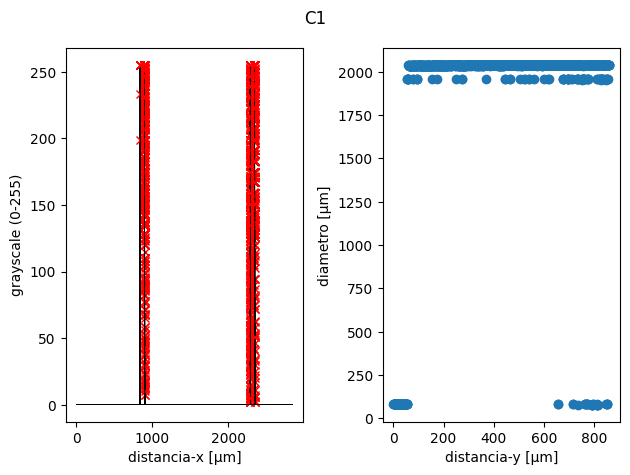

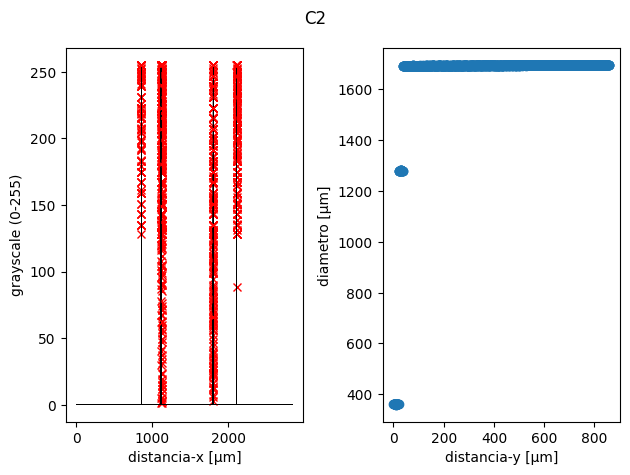

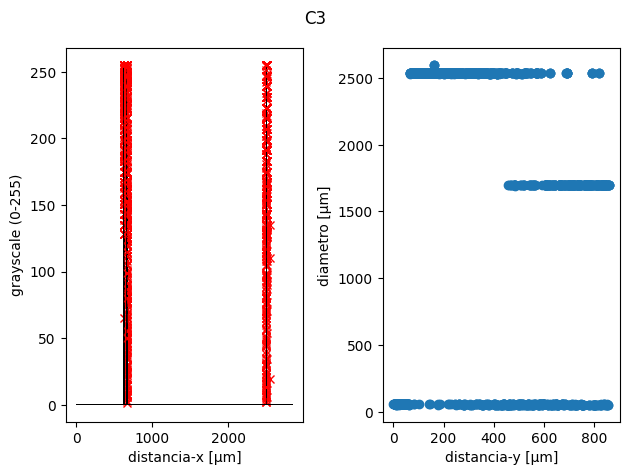

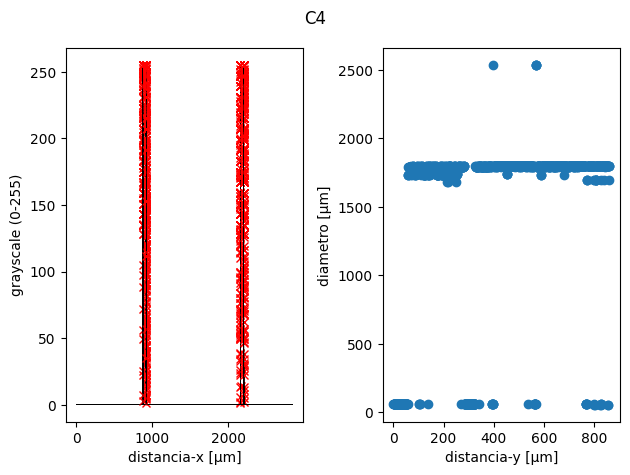

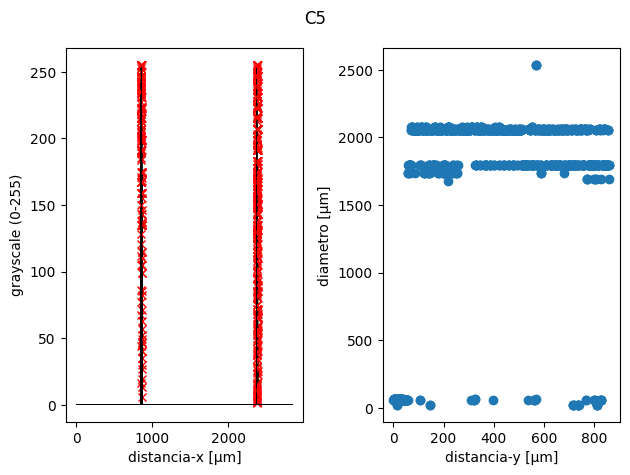

In [40]:
vertical_resolution = 2160 - 1000 # la resolución vertical de nuestras imagenes - 500
rot_arr = -1*np.array([3.85,3.30,3.50,4.60,4.40]) # C1,...,C5
diam_array = np.empty(vertical_resolution, dtype="object")
calibration = 1.35
threshold_value = 127

for n,alpha in enumerate(rot_arr):
    img_path = 'images/raw/C'+str(n+1)+'-diam-5x-1Light.jpg'
    gray_img = rotate_image(
                binarize_image(
                    grayscale_image(img_path), threshold_value
                ),alpha
            )
    
    fig, (ax1,ax2) = plt.subplots(1,2)
    
    for i in np.arange(vertical_resolution):
        y = gray_img[i]
        x = np.arange(y.size)/calibration
        
        x_peaks = find_peaks(y)[0]
        
        ypeak_array = np.empty(vertical_resolution, dtype="object")
        ypeak_array = y[x_peaks]
        
        if x_peaks.size>=2:
            diam_array[i] = x_peaks[-1] - x_peaks[0]

        ax1.plot(x,y,linewidth=0.1,alpha=0.75,color='k')
        ax1.plot(x[x_peaks],ypeak_array,'x',color='r')
        
    ax2.plot(np.arange(vertical_resolution)/calibration, diam_array, 'o', color='tab:blue')
    
    ax2.set_ylabel('diametro [µm]')
    ax2.set_xlabel('distancia-y [µm]')            
    ax1.set_xlabel('distancia-x [µm]')
    ax1.set_ylabel('grayscale (0-255)')
    fig.suptitle('C'+str(n+1))
    fig.tight_layout()

In [ ]:
#cv2.imwrite("processed-gray-C4-5X.jpg", gray_img)

In [ ]:
fig, ax = plt.subplots()
for i in np.arange(gray_img.T[0].size-500):
    y = gray_img[i]
    x = np.arange(y.size)/calibration # px -> µm
    ax.plot(x,y,linewidth=0.1, color='k')

#ax.set_xlim((750,2450))
ax.set_ylim((0,255))
ax.set_ylabel('grayscale [0-255]')
ax.set_xlabel('distancia [µm]')